Data preprocess

In [ ]:
import os
import pandas as pd

# Set the path to the CSV files folder
folder_path = "data"

# Function to check for occurrences of 'taskAccepted' and 'content' containing 'checkedIn'
def check_occurrences(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path, delimiter=';')

        # Count occurrences of 'taskAccepted' and 'content' containing 'checkedIn' in 'taskState' column
        taskAccepted_count = df[df['taskState'].str.contains('taskAccepted', na=False)].shape[0]
        content_checkedIn_count = df[df['taskState'].str.contains('content: checkedIn', na=False)].shape[0]

        # Print file name if conditions are met
        if taskAccepted_count > 4 and content_checkedIn_count > 4:
            print(f"File: {file_path} - taskAccepted count: {taskAccepted_count}, content checkedIn count: {content_checkedIn_count}")

    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")

# Iterate through CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        check_occurrences(file_path)


To better understand the map interactions, try to visualize the map interactions points.
1. Plot every map interaction points in the map.

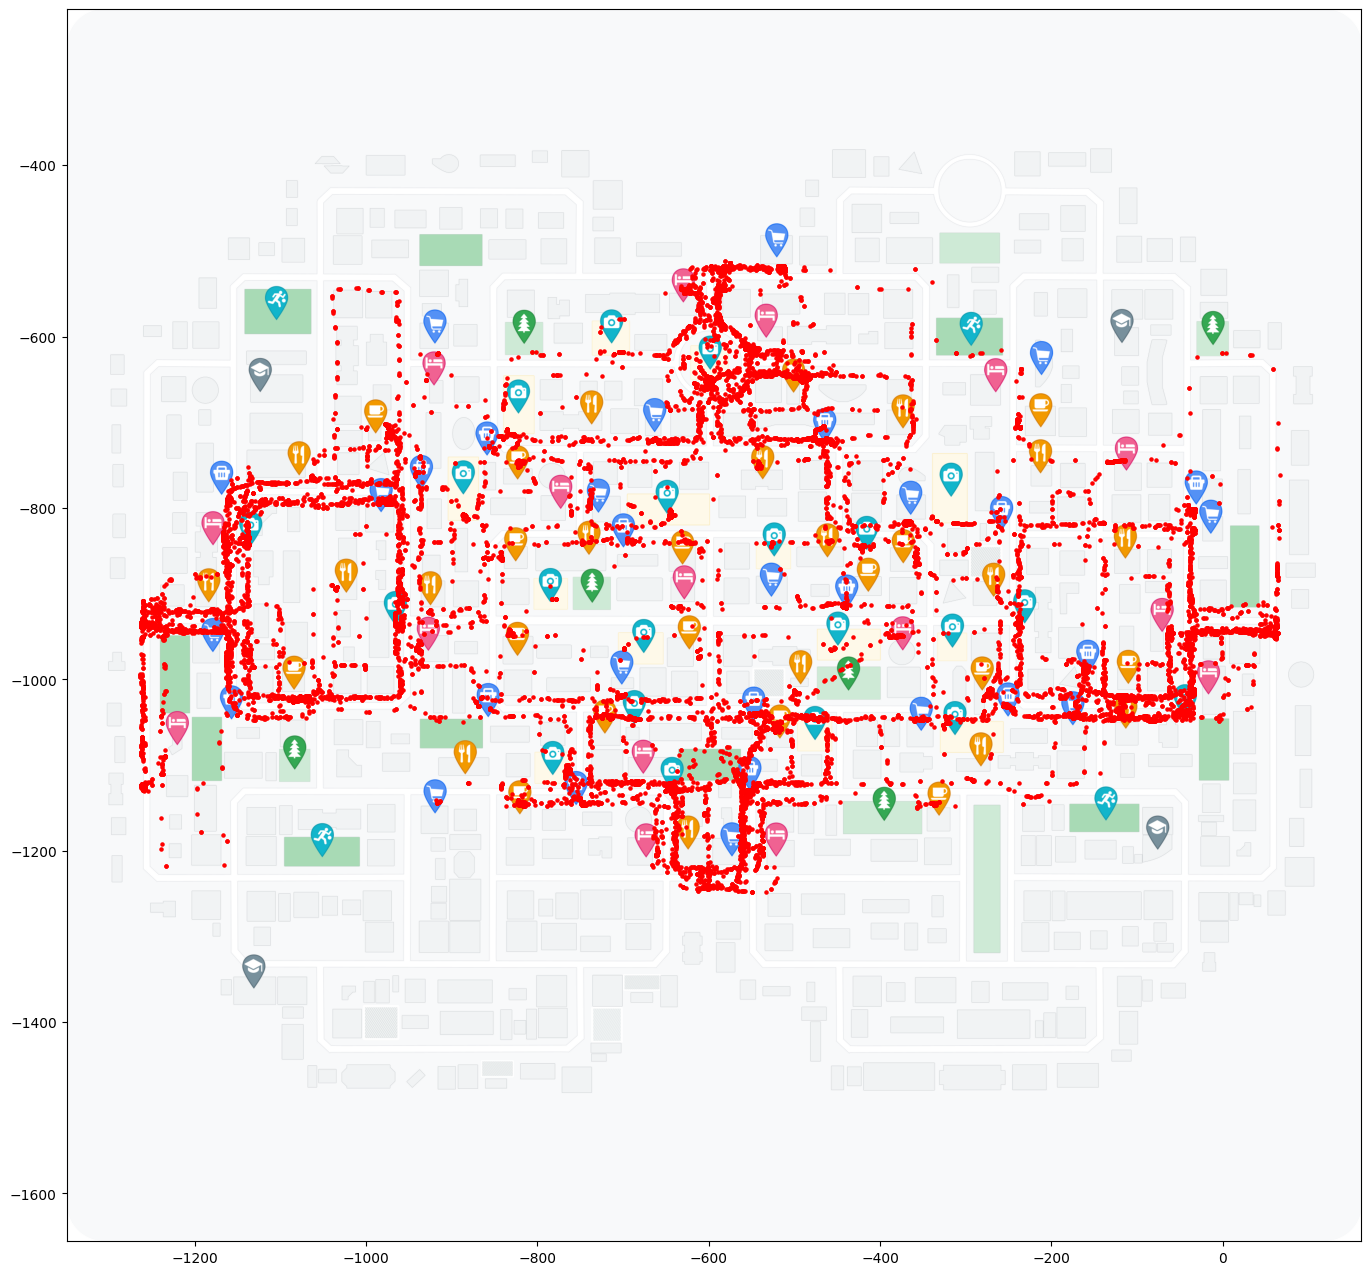

<Figure size 640x480 with 0 Axes>

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

# Set the path to the CSV files folder
folder_path = "data"

# Read the base map image
img = mpimg.imread('map_vector_v3_icons.png')  
img_height, img_width, _ = img.shape
center_x, center_z = -594.0938, -936.8522
bottom_left_x, bottom_left_z = -1349.39, -1655.76
dist_to_left = center_x - bottom_left_x
dist_to_top = center_z - bottom_left_z
x = np.linspace(center_x - dist_to_left, center_x + dist_to_left, img_width)
y = np.linspace(center_z - dist_to_top, center_z + dist_to_top, img_height)
X, Y = np.meshgrid(x, y)

# Plot the base map
plt.figure(figsize=(20, 16))
plt.imshow(img, extent=[x[0], x[-1], y[0], y[-1]])

# Iterate through CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file
        try:
            df = pd.read_csv(file_path, delimiter=';')
            # Filter rows where mapInteractions is not empty
            if 'mapInteractions' in df.columns:
                filtered_df = df[df['mapInteractions'].notnull()]
                # Extract posX and posZ coordinates
                posX = filtered_df['posX'].astype(float)
                posZ = filtered_df['posZ'].astype(float)
                # Plot the points with red color and control size
                plt.scatter(posX, posZ, color='red', s=5, label=file_name)
        except Exception as e:
            print(f"Error processing file {file_name}: {str(e)}")

# Add legend
plt.show()

plt.savefig('all_interaction_points.png')


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Initialize total point counter
total_points = 0

# Iterate through CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file
        try:
            df = pd.read_csv(file_path, delimiter=';')
            # Filter rows where mapInteractions is not empty
            if 'mapInteractions' in df.columns:
                filtered_df = df[df['mapInteractions'].notnull()]
                # Extract posX and posZ coordinates
                posX = filtered_df['posX'].astype(float)
                posZ = filtered_df['posZ'].astype(float)
                num_points = len(posX)  # Number of points to be plotted
                total_points += num_points  # Add to total point counter
        except Exception as e:
            print(f"Error processing file {file_name}: {str(e)}")

print(f"Total number of points plotted across all CSV files: {total_points}")


Total number of points plotted across all CSV files: 35518
